# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 软件和库


此项目的环境使用以下软件和 Python 库：

- [Python 2.7](https://www.python.org/download/releases/2.7/)
- [NumPy](http://www.numpy.org/)
- [pandas](http://pandas.pydata.org/)
- [scikit-learn](http://scikit-learn.org/)
- [matplotlib](http://matplotlib.org/)

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [1]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让结果在notebook中显示
%matplotlib inline

In [2]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

**特征**
1. RM: 该地区中每个房屋的平均房间数量
2. LSTAT: 该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）
3. PTRATIO: 该地区的中学和小学里，学生和老师的数目比（`学生/老师`）

**目标变量**
4. MEDV: 房屋的中值价格

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [3]:
prices_describe_series = prices.describe()

#目标：计算价值的最小值
minimum_price = prices_describe_series["min"]

#目标：计算价值的最大值
maximum_price = prices_describe_series["max"]

#目标：计算价值的平均值
mean_price = prices_describe_series["mean"]

#目标：计算价值的中值
median_price = prices_describe_series["50%"]

#目标：计算价值的标准差
std_price = prices_describe_series["std"]

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：

根据经验和个人偏见，我认为:
>- 增大 `'RM'` 的值，`'MEDV'` 的值会「增大」：
>  - 房间数量多，说明房子大，越大的房子价格越高；

>- 增大 `'LSTAT'` 的值，`'MEDV'` 的值会「减小」：
>  - 低收入的业主人数越低，说明附近的消费水平就越低，所以房子经验上来说会越便宜 ；

>- 增大 `'PTRATIO'` 的值，`'MEDV'` 的值会「减小」：
>  - 经验上，老师多，学生少，单位学生分配到的教育资源就会多，因此教育开销就大。能持续承受大的教育开销说明该地区消费水平高，而消费水平高的地方，房价高；

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [4]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 80% 的数据用于训练，20% 用于测试
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 29)

### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:

>1. 答：
>
>当建立好一个模型之后，总是需要一个方法来评估这个模型的效果，否则我们无法知道该模型的好坏。最简单的当然是代入数据来测试，于是我们需要测试数据。「按一定比例分为【训练用的数据集】和【测试用的数据集】」既可以让我们得到用来评估模型的测试数据，又可以保证我们有足够的训练数据来建模；

>2. 答：
>
>不能用「测试集合」来做「训练集合」做的事，「测试集合」应该只有一个用途：测试 。如果模型已经见过「测试数据」，那模型已然包含了「测试数据」的信息，这就相当于看过试卷后再去考试一样，所得到的成绩会失去说服力。

---
## 第三步. 模型衡量标准
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

或 

- (可选) 不使用任何外部库，参考[决定系数的定义](https://en.wikipedia.org/wiki/Coefficient_of_determination)进行计算，这也可以帮助你更好的理解决定系数在什么情况下等于0或等于1。

In [5]:
# 导入 r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于实际值的分数"""
    score = r2_score(y_true, y_predict)

    return score

根据上文提到的[决定系数的定义](https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) $R^2$ 的公式为：
$$
R^2 = (\frac{\frac{1}{n}\sum_{i=1}^{n}{({y_{pred}}_i - {\bar y_{pred}})(y_i - \overline{y})}}{\sigma_{y_{pred}}\sigma_y})^2
$$

In [6]:
# 根据上面 stattrek 的公式计算 R2
# 不允许导入任何计算决定系数的库

# 辅助函数
def help_fun_cal_mean(l):
    return sum(l)*1.0/len(l)

def help_fun_cal_std(l):
    l_mean = help_fun_cal_mean(l)
    l_std = 0.0
    for n in l:
        l_std += (n-l_mean)**2
    l_std = (l_std/len(l))**0.5
    
    return l_std

def performance_metric2(y_true, y_predict):
    """计算并返回预测值相比于实际值的分数"""
    N = len(y_true)
    y_true_mean = help_fun_cal_mean(y_true)
    y_predict_mean = help_fun_cal_mean(y_predict)
    
    y_true_std = help_fun_cal_std(y_true)
    y_predict_std = help_fun_cal_std(y_predict)
    
    numerator = 0.0
    for i in range(N):
        numerator += (y_true[i] - y_true_mean)*(y_predict[i] - y_predict_mean)
    
    score = (numerator/(y_true_std*y_predict_std*len(y_true)))**2

    return score

根据【课程 6-11 回归指标】中视频的定义，得到的 $R^2$ 的公式：

$$
R^2 = 1-\frac{{MSE}_{regression-model}}{{MSE}_{average-horizontal-line-model}} = 1-\frac{\frac{1}{n}\sum_{i=1}^{n}{(y_i - {y_{pred}}_i)^2}}{\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar y)^2} = 1-\frac{\sum_{i=1}^{n}{(y_i - {y_{pred}}_i)^2}}{\sum_{i=1}^{n}(y_i - \bar y)^2}
$$

In [7]:
# 根据【课程 6-11 回归指标】中视频的定义计算 R2
# 不允许导入任何计算决定系数的库

def performance_metric3(y_true, y_predict):
    """计算并返回预测值相比于实际值的分数"""
    N = len(y_true)
    y_true_mean = help_fun_cal_mean(y_true)
    
    numerator = 0.0
    for i in range(N):
        numerator += (y_true[i] - y_predict[i])**2
    
    denominator = 0.0
    for i in range(N):
        denominator += (y_true[i] - y_true_mean)**2
    score = 1 - numerator/denominator

    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [8]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


In [9]:
# 不使用外部库计算出的决定系数
# 参考 stattrek 的定义计算 R2 —— 和 sklearn.metrics 里的 r2_score 计算结果有区别
score = performance_metric2([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.963.


In [10]:
# 不使用外部库计算出的决定系数
# 参考【课程 6-11 回归指标】的定义计算 R2 —— 和 sklearn.metrics 里的 r2_score 计算结果相同
score = performance_metric3([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:

>答：
>
>可以看到，$R^2$ 的值超过 0.9，也就是说预测值解释了真实值 90% 的变化。所以，该模型算是非常成功地描述了目标变量（真实数据）的变化。

---
## 第四步. 分析模型的表现
在项目的第四步，我们来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树，但这并不是这个项目的重点），和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益，这可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线的在训练集评分和验证集评分的变化，评分使用决定系数R<sup>2</sup>。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

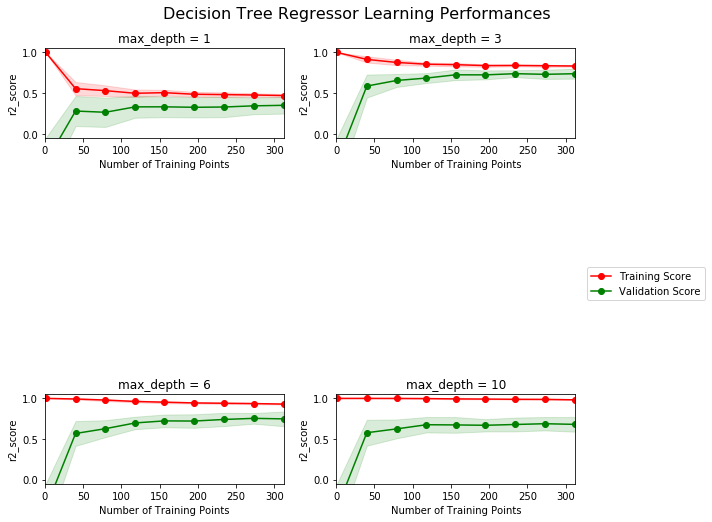

In [11]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

### 问题 4 - 学习曲线
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*

**提示：**学习曲线的评分是否最终会收敛到特定的值？

### 问题 4 - 回答:

>答：
>
>上方左起第二个图像，最大深度为 3（即 max_depth = 3）；
>
>随着训练数据量的增加，训练集曲线「评分下降，且评分值不断趋近于 0.75 左右」；
>
>验证集曲线「评分一开始显著上升，之后评分值不断趋近于 0.75 左右」；
>
>更多的训练数据对该模型的提升「比较有限」，因为学习曲线已经开始收敛到一个特定的值了。

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

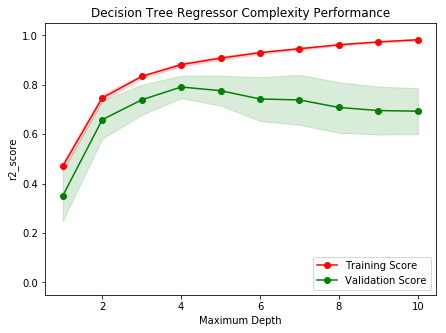

In [12]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

### 问题 5 - 偏差（bias）与方差（variance）之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

### 问题 5 - 回答:

>答：
>
>当模型以最大深度 1 训练时，模型的预测出现了很大的偏差（High Bias）。图中可看到，模型在训练集（training set）和测试集（cross validation set）中的评分都很低，即表现都很差。这说明模型过于简单化，无法捕捉数据复杂度。此时模型的误差主要来自于模型本身的偏差（Bias）；
>
>当模型以最大深度 10 训练时，模型的预测出现了很大的方差（High Variance）。图中可看到两条曲线开始大幅度发散，模型在训练集（training set）中的表现非常好（评分高），但在测试集（cross validation set）中的表现很差（评分低）。这是由于「模型过于复杂，倾向于完全记忆训练集中数据的具体内容，而这种高度具体的性质过滤掉了数据作为一个整体的大类特征」所导致的。此时模型的误差主要来自于具体数据和数据全体间的的方差（Variance）。

### 问题 6- 最优模型的猜测
*结合问题 5 中的图，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

### 问题 6 - 回答:

>答：
>
>我认为最大深度为「4」的模型能够最好地对未见过的数据进行预测。我的依据是图中两条曲线在 Maximun Depth 值为「4」 的时候开始发散，这说明模型开始展现「过拟合」的趋势了，而在此之前的模型则属于「欠拟合」的状态，所以「4」这个点是临界点。

---
## 第五步. 选择最优参数

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化模型？*


### 问题 7 - 回答:

>答：
>
>当超参数（Hyper-parameters）超过一个的时候（比如支持向量机模型就有两个超参数： Kernel 和 Gama），我们就有了不同的「超参数组合」。然后我们创建一个表格，列出所有这些组合所对应的模型的得分，然后从中选最高分作为最佳组合。这种「以表格的形式列出参数组合，然后搜索最优解」的方式就叫做网格搜索法（Grid Search）；
>
>网格搜索优化模型的方式就和上面定义里说的一样，列出组合，求出得分，选出最佳得分。

### 问题 8 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多信息。

### 问题 8 - 回答：

什么是 $K$ 折交叉验证法（k-fold cross-validation）？
>答：
>
>在找最佳拟合方程的时候，人们将数据分成了「训练集合」和「测试集合」，这导致用来训练的数据变少了，因为「测试集合」消耗浪费了一部分有用的数据。
为了能充分利用这些「测试集合」的数据，又不违反黄金法则（即不能使用测试数据来训练模型），于是人们将原始数据将原始数据分成 $N$ 份，每份数据轮流做「测试数据」，这样一共进行 $N$ 次建模。将这 $N$ 次建模得到的 $N$ 个模型求平均值，得到一个最终的模型。这种做法就是「K 折交叉验证」

GridSearchCV 是如何结合交叉验证来完成对最佳参数组合的选择的？
>答：
>
>GridSearchCV 通过 estimator 参数获取要分析的「模型算法」，通过 param_grid 参数获取该模型算法的「各种参数组合」，再通过 scoring 参数来获取「评分标准」，最后通过 cv 参数来获取「将数据集合拆分成【测试集】，【训练集】和【交叉验证集】等的方法」。接着，GridSearchCV 按照 param_grid 的内容建立网格，不同的格子对应着不同的「参数组合」，并按照 scoring 给出的评分标准对【由「不同参数的组合」和「 cv 给出的不同拆分的数据集」共同算出的模型们】逐一打分，将分数填入网格中。最后搜索出所有网格里的最佳得分，进而得到最佳参数组合。

GridSearchCV 中的'cv_results_'属性能告诉我们什么？
>答：
>
>GridSearchCV 中的 'cv_results_' 属性会返回整个网格的内容，GridSearchCV 就是从这张网格中搜索出最佳组合的。在该网格里面，我们可以看到「不同参数的组合」所对应的得分和排名，还可以看到 $K$ 折交叉验证（k-fold cross-validation）中每一种数据拆分方式的得分



网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？
>答：
>
>如果不使用交叉验证，我们要么无法绘制模型复杂度图（model complexity graph）来帮助我们选择既不欠拟合也不过拟合的最佳模型，要么就要使用「测试集」里的数据来辅助得出模型复杂度图（model complexity graph），但后者显然违反了黄金原则：「测试集」不能参与训练模型。
>
>交叉验证本质上是将数据的「训练集合」拆分出一部分，得到「交叉验证集合」，用来代替「测试集」绘制模型复杂度图（model complexity graph）。这样一来，我们技能避免违反黄金原则，又可以在「欠拟合」和「过拟合」之间找到平衡，得到最佳模型。




### 编程练习 4：训练最优模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `'cross_validator'` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `‘performance_metric’` 作为参数传至这个函数中；
5. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；
  
如果你对python函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [13]:
# 提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold(shuffle=True)
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[x+1 for x in range(10)]}

    scoring_fnc = make_scorer(score_func=performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    '''
    # 测试 - 用 cv_results_ 查看网格的内容
    print "cv resultes start"
    print pd.DataFrame(grid.cv_results_).drop(["mean_fit_time", "mean_score_time", "std_fit_time", "std_score_time"], axis=1)
    print "cv resultes end"
    # 测试 - 用 matplotlib 绘图（matplotlib.pyplot 在 visuals.py 文件中被导入成 pl）
    vs.pl.plot(pd.DataFrame(grid.cv_results_)[["split0_test_score", "split0_train_score"]])
    '''
    
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

### 编程练习 4：训练最优模型 （可选）
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：

- 遍历参数`‘max_depth’`的可选值 1～10，构造对应模型
- 计算当前模型的交叉验证分数
- 返回最优交叉验证分数对应的模型

In [14]:
# TODO 4 可选

'''
不允许使用 DecisionTreeRegressor 以外的任何 sklearn 库

提示: 你可能需要实现下面的 cross_val_score 函数

def cross_val_score(estimator, X, y, scoring = performance_metric, cv=3):
    """ 返回每组交叉验证的模型分数的数组 """
    scores = [0,0,0]
    return scores
'''

def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    #最优交叉验证分数对应的最优模型
    best_estimator = None
    
    return best_estimator

### 问题 9 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [15]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### 问题 9 - 回答：

>答：
>
>最优模型的最大深度（maximum depth）是 4 ，此答案与我在**问题 6**所做的猜测相同。

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [16]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $415,400.00
Predicted selling price for Client 2's home: $223,608.00
Predicted selling price for Client 3's home: $919,800.00


### 问题 10 - 回答：

>答：
>
>建议**客户 1** 卖 415,400.00 美元；建议**客户 2** 卖 223,608.00 美元；建议**客户 3** 卖 919,800.00 美元；
>
>**仅**从房屋特征的数值判断，这样的价格还算合理。模型给出的房价预测中，高端房（房间数量多，低收入阶层比率低，学生和老师的比例低）卖的价格高，而低端房子（房间数量少，低收入阶层比率高，学生和老师的比例高）的价格低，这符合预期。

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [17]:
# 提示：你可能需要用到 X_test, y_test, optimal_reg, performance_metric
# 提示：你可能需要参考问题10的代码进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

pred_y = optimal_reg.predict(X_test)
r2 = performance_metric(y_test, pred_y)

print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

Optimal model has R^2 score 0.70 on test data


### 问题11 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？

### 问题11 - 回答

>答：
>
> $R^2$ 的值为 0.71 ，大致说明此处的最优模型解释了 71% 的数据变化的部分。也就是说，当给定 `'RM'`（住宅平均房间数量），`'LSTAT'`（区域中被认为是低收入阶层的比率）和 `'PTRATIO'`（镇上学生与教师数量比例）后，模型预测出的房价对真实房价的标定有 71% 的权重。数学表达如下：
>
>$$
{Price}_{真实} = 0.71 \times {Price}_{最佳模型} + 0.29 \times {Price}_{其他因素}
$$

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。

### 问题 12 - 模型健壮性

模型是否足够健壮来保证预测的一致性？

**提示**: 执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [18]:
# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $379,125.00

Range in prices: $41,497.22


### 问题 12 - 回答：

>答：
>
>虽然测试次数算不上足够，但经过多次运行上述代码观察到，模型对于一个特定客户的房价预测，价格波动范围在 3 万美金到 14.5 万美金之间，这说明该模型还**不够健壮**来保证预测的一致性。

### 问题 13 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

提示：回答以下几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在已考虑通货膨胀的前提下，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*
- *你觉得仅仅凭房屋所在社区的环境来判断房屋价值合理吗？*

### 问题 13 - 回答：

>答：
>
>1978年所采集的数据，只考虑通货膨胀也许不够，毕竟这么多年过去，人们的消费观念和整个社会都有巨大变化。比如原来地理位置差的偏远地区，由于交通便利性提升等城市化进程原因，房价变得更高了。这也进一步说明了，数据中呈现的特征已经不足以描述一个房屋的房价了。
>
>我认为在波士顿这样的大都市采集的数据，能否应用在其他乡镇地区，需要具体判断，但是根据生活经验，通常是无法应用，因为乡镇地区的基础设施通常和大都市不同，所以大都市的数据特征在乡镇地区通常有着不一样的权重。
>
>我觉得仅仅凭房屋所在社区的环境来判断房屋价值，有其合理的地方：
 - 第一，影响房价的因素太多，为了节省定价过程的成本，采用简单粗暴的方法也许是理性的。就好比要去屑，你会直接去买广告上告诉你的海飞丝洗发露，而不是把市面上的所有去屑洗发露都严谨地评测一遍
 - 第二，建议通过「房屋所在社区的环境」的未来状态（尽可能考虑 10 年或更久）来判断房屋价值，而不是仅仅是「房屋所在社区的环境」当前的状态，比如通过「该地区新生儿的数量和占总人口的比例」看未来

## 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中 `bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [19]:
# TODO 6

# 你的代码

### 问题14 - 北京房价预测
你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**提示：**如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。

### 问题14 - 回答